In [857]:
import matplotlib.pyplot as plt
import seaborn as sns
import json
import re
from collections import defaultdict
import string

--------------------------------------------

## Evaluating Connective Detection

In [278]:
def read_jsonl_file(file_path, tag = "predict"):
    predictions = []
    gold_labels = []
    with open(file_path, 'r', encoding='utf-8') as file:
        for line in file:
            item = json.loads(line)  
            predictions.append(item.get("predict"))
            gold_labels.append(item.get("label"))
    return predictions, gold_labels

In [733]:
generated_predictions_disrpt, tagged_gold_samples_disrpt = read_jsonl_file("connective_detection_generated_predictions_disrpt_split.jsonl")
generated_predictions_CoNLL, tagged_gold_samples_CoNLL = read_jsonl_file("connective_detection_generated_predictions_CoNLL_split.jsonl")

## Disrpt Split - Connective Detection

In [734]:
import re
total_TP = 0  
total_FP = 0  
total_FN = 0  
for pred, gold in zip(generated_predictions_disrpt, tagged_gold_samples_disrpt):
    pred_connectives = re.findall(r'\[(.*?)\]', pred)
    gold_connectives = re.findall(r'\[(.*?)\]', gold)
    pred_connectives_stripped = {conn.strip('",;:{}') for conn in pred_connectives}
    gold_connectives_stripped = {conn.strip('",;:{}') for conn in gold_connectives}
    TP = len(pred_connectives_stripped & gold_connectives_stripped)
    FP = len(pred_connectives_stripped - gold_connectives_stripped)  
    if FP > 0:
        print(f"false positive encountered {pred_connectives_stripped - gold_connectives_stripped}")
        print(f'Generated predcition: {pred}')
        print("\n")
        print(f'Gold: {gold}')
        print("\n")   
        print("-----------------------------------------")
        print("\n")
    FN = len(gold_connectives_stripped - pred_connectives_stripped)  
    if FN > 0:
        print(f"false negative encountered {gold_connectives_stripped - pred_connectives_stripped}")
        print(f'Generated predcition: {pred}')
        print("\n")
        print(f'Gold: {gold}')
        print("\n")   
        print("-----------------------------------------")
        print("\n")   
    
    total_TP += TP
    total_FP += FP
    total_FN += FN
    
precision = total_TP / (total_TP + total_FP)
recall = total_TP / (total_TP + total_FN)
f1_score = 2 * (precision * recall) / (precision + recall)

print("Total True Positives (TP):", total_TP)
print("Total False Positives (FP):", total_FP)
print("Total False Negatives (FN):", total_FN)
print("precision:", precision)
print("recall:", recall)
print("F1 Score:", f1_score)

false positive encountered {'before'}
Generated predcition: The Dow industrials were down 55 points at 3 p.m. [before] the futures-trading halt.


Gold: The Dow industrials were down 55 points at 3 p.m. before the futures-trading halt.


-----------------------------------------


false negative encountered {'since'}
Generated predcition: Concerning your Sept. 21 page-one article on Prince Charles and the leeches: It's a few hundred years since England has been a kingdom.


Gold: Concerning your Sept. 21 page-one article on Prince Charles and the leeches: It's a few hundred years [since] England has been a kingdom.


-----------------------------------------


false positive encountered {'thus'}
Generated predcition: [When] a plant has just been running flat out to meet demand, calculating lost profit and [thus] claims under business-interruption insurance is straightforward.


Gold: [When] a plant has just been running flat out to meet demand, calculating lost profit and thus claims u

## CoNLL Split - Connective Detection

In [856]:
import re
total_TP = 0  
total_FP = 0  
total_FN = 0  

connective_count = 0
count = 0
for pred, gold in zip(generated_predictions_CoNLL, tagged_gold_samples_CoNLL):
    pred_connectives = re.findall(r'\[(.*?)\]', pred)
    gold_connectives = re.findall(r'\[(.*?)\]', gold)    
    connective_count += len(gold_connectives)    
    pred_connectives_stripped = {conn.strip('",;:{}') for conn in pred_connectives}
    gold_connectives_stripped = {conn.strip('",;:{}') for conn in gold_connectives}
    TP = len(pred_connectives_stripped & gold_connectives_stripped)
    FP = len(pred_connectives_stripped - gold_connectives_stripped)  
    if FP > 0:
        print(f"false positive encountered {pred_connectives_stripped - gold_connectives_stripped}")
        print(f'predcition: {pred}')
        print("\n")
        print(f'Gold: {gold}')
        print("\n")   
        print("-----------------------------------------")
        print("\n")
    FN = len(gold_connectives_stripped - pred_connectives_stripped)  
    if FN > 0:
        print(f"false negative encountered {gold_connectives_stripped - pred_connectives_stripped}")
        print(f'Generated predcition: {pred}')
        print("\n")
        print(f'Gold: {gold}')
        print("\n")   
        print("-----------------------------------------")
        print("\n")   
    
    total_TP += TP
    total_FP += FP
    total_FN += FN

accuracy = total_TP/connective_count
precision = total_TP / (total_TP + total_FP)
recall = total_TP / (total_TP + total_FN)
f1_score = 2 * (precision * recall) / (precision + recall)
print("Accuracy: ",accuracy)
print("Total True Positives (TP):", total_TP)
print("Total False Positives (FP):", total_FP)
print("Total False Negatives (FN):", total_FN)
print("precision:", precision)
print("recall:", recall)
print("F1 Score:", f1_score)

false positive encountered {'before'}
predcition: The Dow industrials were down 55 points at 3 p.m. [before] the futures-trading halt.


Gold: The Dow industrials were down 55 points at 3 p.m. before the futures-trading halt.


-----------------------------------------


false positive encountered {'after'}
predcition: Stock fund redemptions during the 1987 debacle didn't begin to snowball [until] [after] the market opened on Black Monday.


Gold: Stock fund redemptions during the 1987 debacle didn't begin to snowball [until] after the market opened on Black Monday.


-----------------------------------------


false positive encountered {"If they all were bullish, I'd really be upset."}
predcition: [Nevertheless,] Ms. Garzarelli said she was swamped with phone calls over the weekend from nervous shareholders. "Half of them are really scared [and] want to sell," she said, ["but] I'm trying to talk them out of it." She added, ["If they all were bullish, I'd really be upset."]


Gold: [N

In [827]:
# Initialize totals and tracking dictionaries
total_TP = 0  
total_FP = 0  
total_FN = 0  

connective_stats = defaultdict(lambda: {"TP": 0, "FP": 0, "FN": 0})

for pred, gold in zip(generated_predictions_CoNLL, tagged_gold_samples_CoNLL):
    pred_connectives = re.findall(r'\[(.*?)\]', pred)
    gold_connectives = re.findall(r'\[(.*?)\]', gold)
    
    pred_connectives_stripped = {conn.strip('",;:{}') for conn in pred_connectives}
    gold_connectives_stripped = {conn.strip('",;:{}') for conn in gold_connectives}
    
    # True Positives
    TP_connectives = pred_connectives_stripped & gold_connectives_stripped
    # False Positives
    FP_connectives = pred_connectives_stripped - gold_connectives_stripped
    # False Negatives
    FN_connectives = gold_connectives_stripped - pred_connectives_stripped
    
    # Update total counts
    total_TP += len(TP_connectives)
    total_FP += len(FP_connectives)
    total_FN += len(FN_connectives)
    
    # Update individual connective stats
    for conn in TP_connectives:
        conn = conn.lower().translate(str.maketrans('', '', string.punctuation)).replace(" ","")
        connective_stats[conn]["TP"] += 1
    for conn in FP_connectives:
        conn = conn.lower().translate(str.maketrans('', '', string.punctuation)).replace(" ","")
        connective_stats[conn]["FP"] += 1
    for conn in FN_connectives:
        conn = conn.lower().translate(str.maketrans('', '', string.punctuation)).replace(" ","")
        connective_stats[conn]["FN"] += 1

# Calculate overall precision, recall, and F1 score
precision = total_TP / (total_TP + total_FP) if (total_TP + total_FP) > 0 else 0.0
recall = total_TP / (total_TP + total_FN) if (total_TP + total_FN) > 0 else 0.0
f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0.0

# Calculate per-connective precision, recall, and F1 score
connective_results = []
for conn, stats in connective_stats.items():
    TP = stats["TP"]
    FP = stats["FP"]
    FN = stats["FN"]
    conn_precision = TP / (TP + FP) if (TP + FP) > 0 else 0.0
    conn_recall = TP / (TP + FN) if (TP + FN) > 0 else 0.0
    conn_f1_score = 2 * (conn_precision * conn_recall) / (conn_precision + conn_recall) if (conn_precision + conn_recall) > 0 else 0.0
    connective_results.append({
        "Connective": conn,
        "P-identification": conn_precision,
        "R-identification": conn_recall,
        "F1-identification": conn_f1_score
    })

# Print overall metrics
print("Total True Positives (TP):", total_TP)
print("Total False Positives (FP):", total_FP)
print("Total False Negatives (FN):", total_FN)
print("Overall Precision:", precision)
print("Overall Recall:", recall)
print("Overall F1 Score:", f1_score)

# Print per-connective results
import pandas as pd
connective_results_df = pd.DataFrame(connective_results).sort_values(by="Connective")
print("\nPer-Connective Results:")
connective_results_df.reset_index(drop=True)

Total True Positives (TP): 1172
Total False Positives (FP): 46
Total False Negatives (FN): 60
Overall Precision: 0.9622331691297209
Overall Recall: 0.9512987012987013
Overall F1 Score: 0.9567346938775512

Per-Connective Results:


,Connective,P-identification,R-identification,F1-identification
0,a,1.000000,0.750000,0.857143
1,accordingly,1.000000,0.666667,0.800000
2,addition,1.000000,1.000000,1.000000
3,additionally,1.000000,1.000000,1.000000
4,after,0.928571,1.000000,0.962963
...,...,...,...,...
80,whether,0.000000,0.000000,0.000000
81,while,1.000000,1.000000,1.000000
82,with,0.857143,0.857143,0.857143
83,without,0.666667,0.666667,0.666667


In [772]:
connective_results_df.reset_index(drop=True, inplace = True)
connective_results_df

,Connective,Precision,Recall,F1 Score
0,a,1.000000,0.750000,0.857143
1,accordingly,1.000000,0.666667,0.800000
2,addition,1.000000,1.000000,1.000000
3,additionally,1.000000,1.000000,1.000000
4,after,0.928571,1.000000,0.962963
...,...,...,...,...
80,whether,0.000000,0.000000,0.000000
81,while,1.000000,1.000000,1.000000
82,with,0.857143,0.857143,0.857143
83,without,0.666667,0.666667,0.666667


--------

## Evaluation Relation Classifier

In [509]:
generated_relation_predictions_disrpt, tagged_relation_gold_samples_disrpt = read_jsonl_file("relation_classification_generated_predictions_disrpt_split.jsonl")
generated_relation_predictions_CoNLL, tagged_relation_gold_samples_CoNLL = read_jsonl_file("relation_classification_generated_predictions_CoNLL_split.jsonl")
tagged_relation_gold_samples_disrpt

['.START',
 "No, it wasn't Black Monday.",
 "[But] (Concession) [while] (Concession) the New York Stock Exchange didn't fall apart Friday [as] (Synchronous) the Dow Jones Industrial Average plunged 190.58 points -- most of it in the final hour -- it barely managed to stay this side of chaos.",
 'Some "circuit breakers" installed after the October 1987 crash failed their first test, traders say, unable to cool the selling panic in both stocks and futures.',
 "The 49 stock specialist firms on the Big Board floor -- the buyers and sellers of last resort who were criticized after the 1987 crash -- once again couldn't handle the selling pressure.",
 'Big investment banks refused to step up to the plate to support the beleaguered floor traders [by] (Purpose) buying big blocks of stock, traders say.',
 "Heavy selling of Standard & Poor's 500-stock index futures in Chicago relentlessly beat stocks downward.",
 'Seven Big Board stocks -- UAL, AMR, BankAmerica, Walt Disney, Capital Cities/ABC, P

## Results DISRPT

In [636]:
# Function to classify connectives as TP, FN, or FP in the df
def classify_connective(connective, pred_text, gold_text):
    pred_connectives = re.findall(r'\[(.*?)\]', pred_text)
    gold_connectives = re.findall(r'\[(.*?)\]', gold_text)
    pred_connectives_set = {conn.strip('",;:{}') for conn in pred_connectives}
    gold_connectives_set = {conn.strip('",;:{}') for conn in gold_connectives}
    # Determine the type of match
    if connective in (pred_connectives_set & gold_connectives_set):
        return "True Positive"
    elif connective in (gold_connectives_set - pred_connectives_set):
        return "False Negative"
    elif connective in (pred_connectives_set - gold_connectives_set):
        return "False Positive"
    else:
        return "Other"

In [637]:
rows = []
index = 0
# Just to know when we should increase the index as 
gold_text_buffer = tagged_relation_gold_samples_disrpt[0]
for gold, pred in zip(tagged_relation_gold_samples_disrpt, generated_relation_predictions_disrpt):
    gold_tags = extract_tags(gold)
    pred_tags = extract_tags(pred)
    if gold_text_buffer != gold:
        gold_text_buffer = gold
        index += 1
    for i, (connective, gold_rel) in enumerate(gold_tags):
        connective = connective.strip('",;:{}')
        pred_rel = pred_tags[i][1] if i < len(pred_tags) else "N/A"
        pred_rel = pred_rel.strip('",;:{}')
        evaluation = classify_connective(connective, generated_predictions_disrpt[index], tagged_gold_samples_disrpt[index])  # Evaluate TP, FP, FN
        rows.append({
            "Connective": connective,
            "Predicted_relation": pred_rel,
            "Gold_relation": gold_rel,
            "gold_text": gold,
            "predicted_text": pred,
            "Evaluation": evaluation  
        })
df_disrpt = pd.DataFrame(rows)
df_disrpt

,Connective,Predicted_relation,Gold_relation,gold_text,predicted_text,Evaluation
0,But,Concession,Concession,[But] (Concession) [while] (Concession) the Ne...,[But] (Concession) [while] (Concession) the Ne...,True Positive
1,while,Concession,Concession,[But] (Concession) [while] (Concession) the Ne...,[But] (Concession) [while] (Concession) the Ne...,True Positive
2,as,Cause,Synchronous,[But] (Concession) [while] (Concession) the Ne...,[But] (Concession) [while] (Concession) the Ne...,True Positive
3,by,Purpose,Purpose,Big investment banks refused to step up to the...,Big investment banks refused to step up to the...,True Positive
4,and,Conjunction,Conjunction,"Seven Big Board stocks -- UAL, AMR, BankAmeric...","Seven Big Board stocks -- UAL, AMR, BankAmeric...",True Positive
...,...,...,...,...,...,...
1252,and,Conjunction,Conjunction,Himont faces lower prices for its mainstay pro...,Himont faces lower prices for its mainstay pro...,True Positive
1253,because,Cause,Cause,Some analysts hedge their estimates for Quantu...,Some analysts hedge their estimates for Quantu...,True Positive
1254,But,Concession,Concession,[But] (Concession) the estimates range from br...,[But] (Concession) the estimates range from br...,True Positive
1255,before,Asynchronous,Asynchronous,"The offering, Series 102, backed by Freddie Ma...","The offering, Series 102, backed by Freddie Ma...",True Positive


## End to end accuracy DISRPT


In [638]:
end_to_end_df_disrpt_tp = df_disrpt.query("Evaluation == 'True Positive' and Predicted_relation == Gold_relation")
ACC = len(end_to_end_df_disrpt_tp) / len(df_disrpt)
ACC

0.8671439936356404

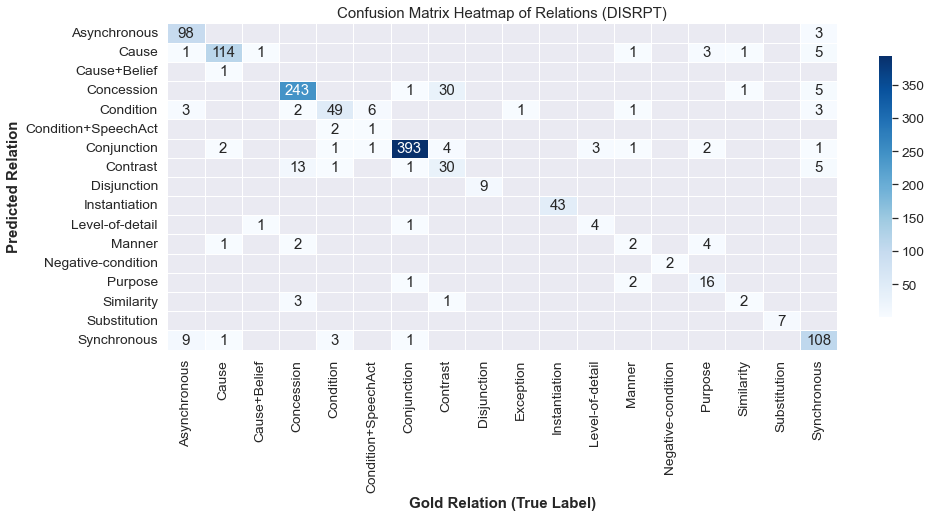

In [640]:
confusion_matrix = pd.crosstab(df_disrpt['Predicted_relation'], df_disrpt['Gold_relation'])
mask = confusion_matrix == 0
plt.figure(figsize=(15, 6))  
sns.set(font_scale=1.25)      

sns.heatmap(
    confusion_matrix, 
    annot=True,              # Display the counts on the heatmap
    cmap="Blues",            # Use a color map 
    fmt='g',                 # 'g' ensures integers are displayed correctly
    linewidths=0.5,          # Add gridlines
    mask=mask,               # mask the 0s
    cbar_kws={'shrink': 0.8} # Shrink the colorbar slightly
)

plt.xlabel('Gold Relation (True Label)',fontweight='bold')
plt.ylabel('Predicted Relation',fontweight='bold')
plt.title('Confusion Matrix Heatmap of Relations (DISRPT)')
plt.show()

In [519]:
df_disrpt["Predicted_relation"].unique()

array(['Concession', 'Cause', 'Purpose', 'Conjunction', 'Synchronous',
       'Asynchronous', 'Contrast', 'Instantiation', 'Condition', 'Manner',
       'Substitution', 'Disjunction', 'Level-of-detail', 'Similarity',
       'Cause+Belief', 'Condition+SpeechAct', 'Negative-condition'],
      dtype=object)

In [520]:
from collections import defaultdict
tp = defaultdict(int)
predicted_count = defaultdict(int)
gold_count = defaultdict(int)

tp_count = 0
# Count true positives, predicted, and gold occurrences
for _, row in df_disrpt.iterrows():
    pred_rel = row["Predicted_relation"]
    gold_rel = row["Gold_relation"]
    if pred_rel == gold_rel:
        tp[pred_rel] += 1 
        tp_count += 1
    predicted_count[pred_rel] += 1  
    gold_count[gold_rel] += 1  
    
precision = {rel: tp[rel] / predicted_count[rel] if predicted_count[rel] > 0 else 0 for rel in set(predicted_count) | set(gold_count)}
recall = {rel: tp[rel] / gold_count[rel] if gold_count[rel] > 0 else 0 for rel in set(predicted_count) | set(gold_count)}

f1_scores = {
    rel: (2 * precision[rel] * recall[rel]) / (precision[rel] + recall[rel]) if (precision[rel] + recall[rel]) > 0 else 0
    for rel in set(predicted_count) | set(gold_count)
}

print("Precision per relation:")
for rel, value in precision.items():
    print(f"{rel}: {value:.2f}")

print("\nRecall per relation:")
for rel, value in recall.items():
    print(f"{rel}: {value:.2f}")
    
print("\nF1 Score per relation:")
count = 0 
sum_f1 = 0
for rel, value in f1_scores.items():
    sum_f1 += value
    count += 1
    print(f"{rel}: {value:.2f}")

macrof1 = sum_f1 / count if count > 0 else 0
print(f"\nMacro F1 score = {macrof1:.2f}")

Precision per relation:
Contrast: 0.60
Manner: 0.22
Asynchronous: 0.97
Exception: 0.00
Condition: 0.75
Cause: 0.90
Substitution: 1.00
Concession: 0.87
Synchronous: 0.89
Conjunction: 0.96
Similarity: 0.33
Purpose: 0.84
Level-of-detail: 0.67
Disjunction: 1.00
Instantiation: 1.00
Cause+Belief: 0.00
Negative-condition: 1.00
Condition+SpeechAct: 0.33

Recall per relation:
Contrast: 0.46
Manner: 0.29
Asynchronous: 0.88
Exception: 0.00
Condition: 0.88
Cause: 0.96
Substitution: 1.00
Concession: 0.92
Synchronous: 0.83
Conjunction: 0.99
Similarity: 0.50
Purpose: 0.64
Level-of-detail: 0.57
Disjunction: 1.00
Instantiation: 1.00
Cause+Belief: 0.00
Negative-condition: 1.00
Condition+SpeechAct: 0.12

F1 Score per relation:
Contrast: 0.52
Manner: 0.25
Asynchronous: 0.92
Exception: 0.00
Condition: 0.81
Cause: 0.93
Substitution: 1.00
Concession: 0.90
Synchronous: 0.86
Conjunction: 0.98
Similarity: 0.40
Purpose: 0.73
Level-of-detail: 0.62
Disjunction: 1.00
Instantiation: 1.00
Cause+Belief: 0.00
Negative-

In [521]:
print(f"Accuracy: {tp_count/len(df_disrpt)}")

Accuracy: 0.8918058870326173


In [527]:
results = []
for relation in df_disrpt["Gold_relation"].unique():
    true_positive = df_disrpt[(df_disrpt["Gold_relation"] == relation) & (df_disrpt["Predicted_relation"] == relation)].shape[0]
    gold_count = df_disrpt[df_disrpt["Gold_relation"] == relation].shape[0]
    prediction_count = df_disrpt[df_disrpt["Predicted_relation"] == relation].shape[0]

    precision = true_positive / prediction_count if prediction_count > 0 else 0
    recall = true_positive / gold_count if gold_count > 0 else 0
    f1_score = (2 * precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

    results.append({
        "Relation": relation,
        "True_positive": true_positive,
        "Gold_count": gold_count,
        "Prediction_count": prediction_count,
        "Precision": precision,
        "Recall": recall,
        "F1_score": f1_score,
    })
summary_df_disrpt = pd.DataFrame(results)
summary_df_disrpt

,Relation,True_positive,Gold_count,Prediction_count,Precision,Recall,F1_score
0,Concession,243,263,280,0.867857,0.923954,0.895028
1,Synchronous,108,130,122,0.885246,0.830769,0.857143
2,Purpose,16,25,19,0.842105,0.640000,0.727273
3,Conjunction,393,398,408,0.963235,0.987437,0.975186
4,Condition,49,56,65,0.753846,0.875000,0.809917
5,Cause,114,119,126,0.904762,0.957983,0.930612
6,Asynchronous,98,111,101,0.970297,0.882883,0.924528
7,Instantiation,43,43,43,1.000000,1.000000,1.000000
8,Contrast,30,65,50,0.600000,0.461538,0.521739
9,Manner,2,7,9,0.222222,0.285714,0.250000


In [536]:
total_true_positive = 0
total_gold_count = 0
total_prediction_count = 0
macro_f1 = 0
num_relations = len(summary_df_disrpt)

for _, row in summary_df_disrpt.iterrows():
    total_true_positive += row["True_positive"]
    total_gold_count += row["Gold_count"]
    total_prediction_count += row["Prediction_count"]
    macro_f1 += row["F1_score"]

micro_precision = total_true_positive / total_prediction_count if total_prediction_count > 0 else 0
micro_recall = total_true_positive / total_gold_count if total_gold_count > 0 else 0
micro_f1 = (2 * micro_precision * micro_recall) / (micro_precision + micro_recall) if (micro_precision + micro_recall) > 0 else 0

macro_f1 = macro_f1 / num_relations if num_relations > 0 else 0

print(f"Micro-F1: {micro_f1:.4f}")
print(f"Macro-F1: {macro_f1:.4f}")

Micro-F1: 0.8918
Macro-F1: 0.6716


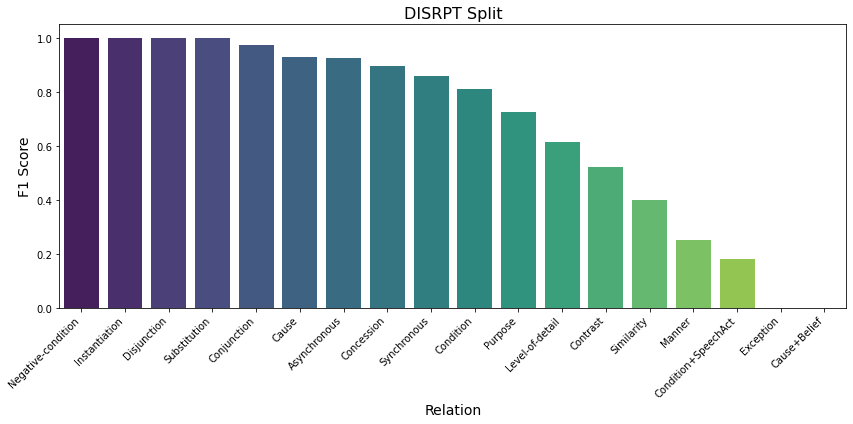

In [537]:
sorted_summary_df_disrpt = summary_df_disrpt.sort_values(by="F1_score", ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(data=sorted_summary_df_disrpt, x="Relation", y="F1_score", palette="viridis")
plt.xlabel("Relation", fontsize=14)
plt.ylabel("F1 Score", fontsize=14)
plt.title("DISRPT Split", fontsize=16)
plt.xticks(rotation=45, ha="right")

plt.tight_layout()
plt.show()

## CoNLL Results

In [646]:
rows = []
index = 0
# Just to know when we should increase the index as 
gold_text_buffer = tagged_relation_gold_samples_CoNLL[0]
for gold, pred in zip(tagged_relation_gold_samples_CoNLL, generated_relation_predictions_CoNLL):
    gold_tags = extract_tags(gold)
    pred_tags = extract_tags(pred)
    
    if gold_text_buffer != gold:
        gold_text_buffer = gold
        index += 1

    for i, (connective, gold_rel) in enumerate(gold_tags):
        connective = connective.strip('",;:{}')
        pred_rel = pred_tags[i][1] if i < len(pred_tags) else "N/A"
        pred_rel = pred_rel.strip('",;:{}')
        evaluation = classify_connective(connective, generated_predictions_CoNLL[index], tagged_gold_samples_CoNLL[index])  # Evaluate TP, FP, FN
        rows.append({
            "Connective": connective,
            "Predicted_relation": pred_rel,
            "Gold_relation": gold_rel,
            "gold_text": gold,
            "predicted_text": pred,
            "Evaluation": evaluation  
        })
    
        
df_CoNLL = pd.DataFrame(rows)
df_CoNLL

,Connective,Predicted_relation,Gold_relation,gold_text,predicted_text,Evaluation
0,But,Concession,Concession,[But] (Concession) [while] (Concession) the Ne...,[But] (Concession) [while] (Concession) the Ne...,True Positive
1,while,Concession,Concession,[But] (Concession) [while] (Concession) the Ne...,[But] (Concession) [while] (Concession) the Ne...,True Positive
2,as,Cause,Synchronous,[But] (Concession) [while] (Concession) the Ne...,[But] (Concession) [while] (Concession) the Ne...,True Positive
3,by,Manner,Purpose,Big investment banks refused to step up to the...,Big investment banks refused to step up to the...,True Positive
4,and,Conjunction,Conjunction,"Seven Big Board stocks -- UAL, AMR, BankAmeric...","Seven Big Board stocks -- UAL, AMR, BankAmeric...",True Positive
...,...,...,...,...,...,...
1252,and,Conjunction,Conjunction,Himont faces lower prices for its mainstay pro...,Himont faces lower prices for its mainstay pro...,True Positive
1253,because,Cause,Cause,Some analysts hedge their estimates for Quantu...,Some analysts hedge their estimates for Quantu...,True Positive
1254,But,Concession,Concession,[But] (Concession) the estimates range from br...,[But] (Concession) the estimates range from br...,True Positive
1255,before,Asynchronous,Asynchronous,"The offering, Series 102, backed by Freddie Ma...","The offering, Series 102, backed by Freddie Ma...",True Positive


In [825]:
# Compute the relation metrics per connective 
def compute_metrics(group):
    tp = (group['Predicted_relation'] == group['Gold_relation']).sum()
    fp = (group['Predicted_relation'] != group['Gold_relation']).sum()
    fn = (group['Evaluation'] == 'False Negative').sum()
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
    return pd.Series({
        'P-sense': precision,
        'R-sense': recall,
        'F1-sense': f1
    })
# Group by 'Connective' and apply the metric computation
sense_metrics = df_CoNLL.groupby('Connective').apply(compute_metrics).reset_index()
print(sense_metrics)

      Connective   P-sense   R-sense  F1-sense
0              a  1.000000  0.800000  0.888889
1    accordingly  1.000000  0.750000  0.857143
2       addition  1.000000  1.000000  1.000000
3   additionally  1.000000  1.000000  1.000000
4          after  1.000000  1.000000  1.000000
..           ...       ...       ...       ...
73       whereas  1.000000  1.000000  1.000000
74         while  0.675676  1.000000  0.806452
75          with  0.857143  0.857143  0.857143
76       without  0.666667  0.666667  0.666667
77           yet  1.000000  1.000000  1.000000

[78 rows x 4 columns]


In [783]:
def compute_identification_metrics(group):
    tp = (group['Evaluation'] == 'True Positive').sum()
    fp = (group['Evaluation'] == 'False Positive').sum()
    fn = (group['Evaluation'] == 'False Negative').sum() 
    precision_id = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall_id = tp / (tp + fn) if (tp + fn) > 0 else 0
    f1_id = 2 * (precision_id * recall_id) / (precision_id + recall_id) if (precision_id + recall_id) > 0 else 0
    return pd.Series({
        'P-identification': precision_id,
        'R-identification': recall_id,
        'F1-identification': f1_id
    })

# Function to compute metrics for sense classification
def compute_sense_metrics(group):
    correct_sense = (group['Predicted_relation'] == group['Gold_relation']).sum()
    total_predicted = len(group)
    total_gold = len(group)
    
    precision_sense = correct_sense / total_predicted if total_predicted > 0 else 0
    recall_sense = correct_sense / total_gold if total_gold > 0 else 0
    f1_sense = 2 * (precision_sense * recall_sense) / (precision_sense + recall_sense) if (precision_sense + recall_sense) > 0 else 0
    
    return pd.Series({
        'P-sense': precision_sense,
        'R-sense': recall_sense,
        'F1-sense': f1_sense
    })

df_CoNLL['Connective'] = df_CoNLL['Connective'].str.lower().str.translate(str.maketrans('', '', string.punctuation))

# Compute identification and sense metrics
identification_metrics = df_CoNLL.groupby('Connective').apply(compute_identification_metrics)
sense_metrics = df_CoNLL.groupby('Connective').apply(compute_sense_metrics)

# Combine both metrics into a single result
final_result = pd.concat([identification_metrics, sense_metrics], axis=1)

# Select the top 6 most frequent connectives
final_result = final_result.reset_index()
final_result.rename(columns={'index': 'Connective'}, inplace=True)
final_columns = [
    'Connective', 
    'P-identification', 
    'R-identification', 
    'P-sense', 
    'R-sense', 
    'F1-identification', 
    'F1-sense'
]
final_result = final_result[final_columns]

final_result

,Connective,P-identification,R-identification,P-sense,R-sense,F1-identification,F1-sense
0,a,1.0,0.750000,1.000000,1.000000,0.857143,1.000000
1,accordingly,1.0,0.666667,1.000000,1.000000,0.800000,1.000000
2,addition,1.0,1.000000,1.000000,1.000000,1.000000,1.000000
3,additionally,1.0,1.000000,1.000000,1.000000,1.000000,1.000000
4,after,1.0,1.000000,1.000000,1.000000,1.000000,1.000000
...,...,...,...,...,...,...,...
73,whereas,1.0,1.000000,1.000000,1.000000,1.000000,1.000000
74,while,1.0,1.000000,0.675676,0.675676,1.000000,0.675676
75,with,1.0,0.857143,0.857143,0.857143,0.923077,0.857143
76,without,1.0,0.666667,0.666667,0.666667,0.800000,0.666667


In [824]:
connective_results_df

,Connective,Precision,Recall,F1 Score
0,a,1.000000,0.750000,0.857143
1,accordingly,1.000000,0.666667,0.800000
2,addition,1.000000,1.000000,1.000000
3,additionally,1.000000,1.000000,1.000000
4,after,0.928571,1.000000,0.962963
...,...,...,...,...
80,whether,0.000000,0.000000,0.000000
81,while,1.000000,1.000000,1.000000
82,with,0.857143,0.857143,0.857143
83,without,0.666667,0.666667,0.666667


In [828]:
merged_df_new_sense = connective_results_df.merge(sense_metrics, on='Connective', how='inner')
merged_df_new_sense

,Connective,P-identification,R-identification,F1-identification,P-sense,R-sense,F1-sense
0,a,1.000000,0.750000,0.857143,1.000000,0.800000,0.888889
1,accordingly,1.000000,0.666667,0.800000,1.000000,0.750000,0.857143
2,addition,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
3,additionally,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
4,after,0.928571,1.000000,0.962963,1.000000,1.000000,1.000000
...,...,...,...,...,...,...,...
73,whereas,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
74,while,1.000000,1.000000,1.000000,0.675676,1.000000,0.806452
75,with,0.857143,0.857143,0.857143,0.857143,0.857143,0.857143
76,without,0.666667,0.666667,0.666667,0.666667,0.666667,0.666667


In [859]:
worst_connectives_tagging = merged_df_new_sense.sort_values(by=['F1-identification',"F1-sense"], ascending=True)
worst_connectives_tagging.head()

,Connective,P-identification,R-identification,F1-identification,P-sense,R-sense,F1-sense
24,given,0.0,0.0,0.0,0.0,0.0,0.000000
40,now,0.0,0.0,0.0,0.0,0.0,0.000000
22,finally,0.0,0.0,0.0,1.0,0.5,0.666667
26,hence,0.0,0.0,0.0,1.0,0.5,0.666667
58,specifically,0.0,0.0,0.0,1.0,0.5,0.666667


In [860]:
top_connectives_tagging= merged_df_new_sense.sort_values(by=['F1-identification',"F1-sense"], ascending=False)
top_connectives_tagging.head()

,Connective,P-identification,R-identification,F1-identification,P-sense,R-sense,F1-sense
2,addition,1.0,1.0,1.0,1.0,1.0,1.0
3,additionally,1.0,1.0,1.0,1.0,1.0,1.0
9,at,1.0,1.0,1.0,1.0,1.0,1.0
10,because,1.0,1.0,1.0,1.0,1.0,1.0
12,besides,1.0,1.0,1.0,1.0,1.0,1.0


## End to end accuracy

In [648]:
end_to_end_df_CoNLL_tp = df_CoNLL.query("Evaluation == 'True Positive' and Predicted_relation == Gold_relation")
ACC = len(end_to_end_df_CoNLL_tp) / len(df_CoNLL)
ACC

0.9514717581543357

In [649]:
from sklearn.metrics import f1_score

filtered_df = end_to_end_df_CoNLL_tp

labels = filtered_df["Gold_relation"].unique()

# True labels and predictions
y_true = filtered_df["Gold_relation"]
y_pred = filtered_df["Predicted_relation"]
# Calculate macro F1 score
macro_f1 = f1_score(y_true, y_pred, labels=labels, average="macro")
print("Macro F1 Score:", macro_f1)

Macro F1 Score: 0.6639479441096485


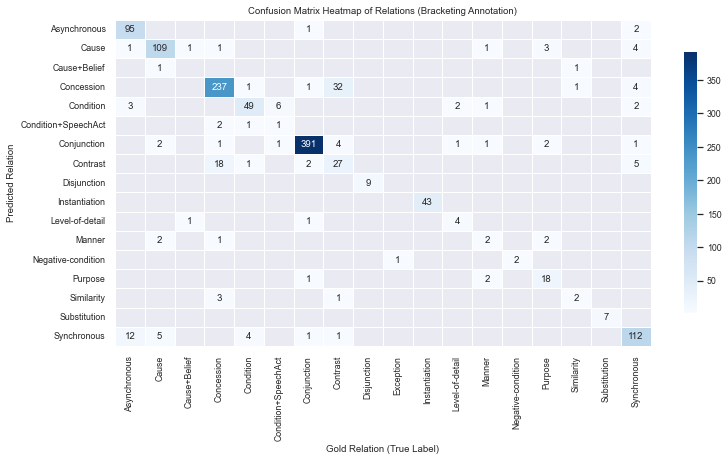

In [651]:
confusion_matrix = pd.crosstab(df_CoNLL['Predicted_relation'], df_CoNLL['Gold_relation'])
mask = confusion_matrix == 0
plt.figure(figsize=(12, 6))  
sns.set(font_scale=0.8)      

sns.heatmap(
    confusion_matrix, 
    annot=True,              # Display the counts on the heatmap
    cmap="Blues",            # Use a color map 
    fmt='g',                 # 'g' ensures integers are displayed correctly
    linewidths=0.5,          # Add gridlines
    mask=mask,               # mask 
    cbar_kws={'shrink': 0.8} # Shrink the colorbar slightly
)

plt.xlabel('Gold Relation (True Label)')
plt.ylabel('Predicted Relation')
plt.title('Confusion Matrix Heatmap of Relations (Bracketing Annotation)')
plt.show()

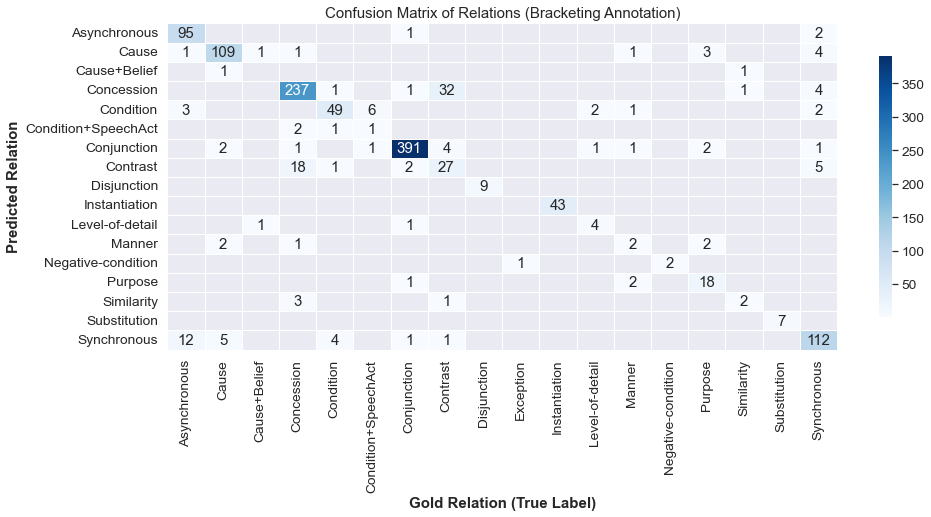

In [658]:
confusion_matrix = pd.crosstab(df_CoNLL['Predicted_relation'], df_CoNLL['Gold_relation'])
mask = confusion_matrix == 0
plt.figure(figsize=(15, 6))  
sns.set(font_scale=1.25)      

sns.heatmap(
    confusion_matrix, 
    annot=True,              # Display the counts on the heatmap
    cmap="Blues",            # Use a color map 
    fmt='g',                 # 'g' ensures integers are displayed correctly
    linewidths=0.5,          # Add gridlines
    mask=mask,               # mask the 0s
    cbar_kws={'shrink': 0.8} # Shrink the colorbar slightly
)
plt.xlabel('Gold Relation (True Label)',fontweight='bold')
plt.ylabel('Predicted Relation',fontweight='bold')
plt.title('Confusion Matrix of Relations (Bracketing Annotation)')
plt.show()

In [650]:
tp = defaultdict(int)
predicted_count = defaultdict(int)
gold_count = defaultdict(int)
tp_count = 0

# Count true positives, predicted, and gold occurrences
for _, row in df_CoNLL.iterrows():
    pred_rel = row["Predicted_relation"]
    gold_rel = row["Gold_relation"]
    if pred_rel == gold_rel:
        tp[pred_rel] += 1 
        tp_count += 1
    predicted_count[pred_rel] += 1  
    gold_count[gold_rel] += 1  
    

precision = {rel: tp[rel] / predicted_count[rel] if predicted_count[rel] > 0 else 0 for rel in set(predicted_count) | set(gold_count)}
recall = {rel: tp[rel] / gold_count[rel] if gold_count[rel] > 0 else 0 for rel in set(predicted_count) | set(gold_count)}

f1_scores = {
    rel: (2 * precision[rel] * recall[rel]) / (precision[rel] + recall[rel]) if (precision[rel] + recall[rel]) > 0 else 0
    for rel in set(predicted_count) | set(gold_count)
}

print("Precision per relation:")
for rel, value in precision.items():
    print(f"{rel}: {value:.2f}")

print("\nRecall per relation:")
for rel, value in recall.items():
    print(f"{rel}: {value:.2f}")
    
print("\nF1 Score per relation:")
count = 0 
sum_f1 = 0
for rel, value in f1_scores.items():
    sum_f1 += value
    count += 1
    print(f"{rel}: {value:.2f}")

macrof1 = sum_f1 / count if count > 0 else 0
print(f"\nMacro F1 score = {macrof1:.2f}")

Precision per relation:
Contrast: 0.51
Manner: 0.33
Asynchronous: 0.97
Exception: 0.00
Condition: 0.77
Cause: 0.91
Substitution: 1.00
Concession: 0.87
Synchronous: 0.86
Conjunction: 0.97
Similarity: 0.40
Purpose: 0.83
Level-of-detail: 0.67
Disjunction: 1.00
Instantiation: 1.00
Cause+Belief: 0.00
Negative-condition: 0.67
Condition+SpeechAct: 0.33

Recall per relation:
Contrast: 0.43
Manner: 0.29
Asynchronous: 0.87
Exception: 0.00
Condition: 0.87
Cause: 0.94
Substitution: 1.00
Concession: 0.91
Synchronous: 0.86
Conjunction: 0.98
Similarity: 1.00
Purpose: 0.68
Level-of-detail: 0.40
Disjunction: 1.00
Instantiation: 1.00
Cause+Belief: 0.00
Negative-condition: 1.00
Condition+SpeechAct: 0.12

F1 Score per relation:
Contrast: 0.46
Manner: 0.31
Asynchronous: 0.91
Exception: 0.00
Condition: 0.81
Cause: 0.92
Substitution: 1.00
Concession: 0.89
Synchronous: 0.86
Conjunction: 0.97
Similarity: 0.57
Purpose: 0.75
Level-of-detail: 0.50
Disjunction: 1.00
Instantiation: 1.00
Cause+Belief: 0.00
Negative-

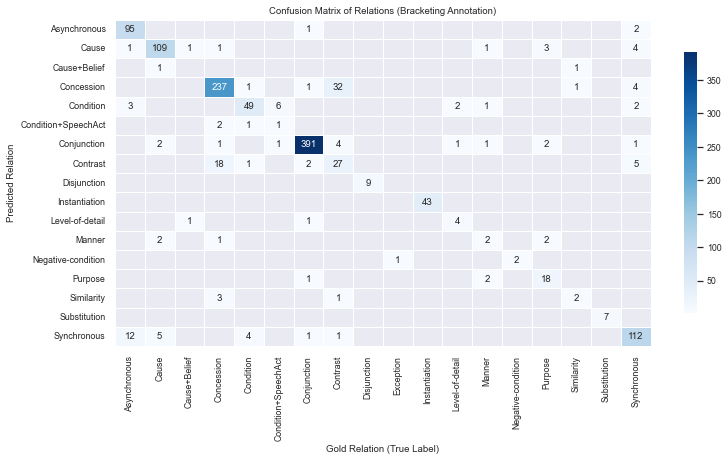

In [657]:
confusion_matrix = pd.crosstab(df_CoNLL['Predicted_relation'], df_CoNLL['Gold_relation'])
mask = confusion_matrix == 0
plt.figure(figsize=(12, 6))  
sns.set(font_scale=0.8)      

sns.heatmap(
    confusion_matrix, 
    annot=True,              # Display the counts on the heatmap
    cmap="Blues",            # Use a color map 
    fmt='g',                 # 'g' ensures integers are displayed correctly
    linewidths=0.5,          # Add gridlines
    mask=mask,
    cbar_kws={'shrink': 0.8} # Shrink the colorbar slightly
)

plt.xlabel('Gold Relation (True Label)')
plt.ylabel('Predicted Relation')
plt.title('Confusion Matrix Heatmap of Relations')

plt.show()

In [530]:
total_true_positive = 0
total_gold_count = 0
total_prediction_count = 0
macro_f1 = 0
num_relations = len(summary_df_CoNLL)

for _, row in summary_df_CoNLL.iterrows():
    total_true_positive += row["True_positive"]
    total_gold_count += row["Gold_count"]
    total_prediction_count += row["Prediction_count"]
    macro_f1 += row["F1_score"]

micro_precision = total_true_positive / total_prediction_count if total_prediction_count > 0 else 0
micro_recall = total_true_positive / total_gold_count if total_gold_count > 0 else 0
micro_f1 = (2 * micro_precision * micro_recall) / (micro_precision + micro_recall) if (micro_precision + micro_recall) > 0 else 0

macro_f1 = macro_f1 / num_relations if num_relations > 0 else 0

print(f"Micro-F1: {micro_f1:.4f}")
print(f"Macro-F1: {macro_f1:.4f}")

Micro-F1: 0.8815
Macro-F1: 0.6585


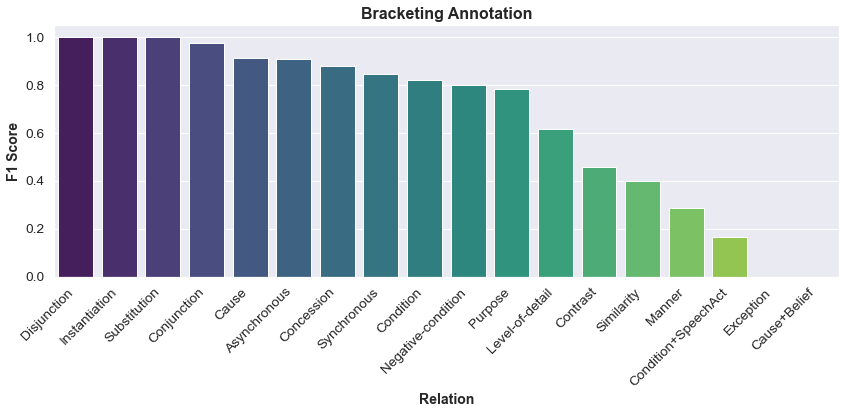

In [656]:
sorted_summary_df_CoNLL = summary_df_CoNLL.sort_values(by="F1_score", ascending=False)

plt.figure(figsize=(12, 6))
sns.set(font_scale=1.25)      
sns.barplot(data=sorted_summary_df_CoNLL, x="Relation", y="F1_score", palette="viridis")
plt.xlabel("Relation", fontsize=14, fontweight='bold')
plt.ylabel("F1 Score", fontsize=14, fontweight='bold')
plt.title("Bracketing Annotation", fontsize=16, fontweight='bold')
# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha="right")  

plt.tight_layout()
plt.show()